# Etapas do Processo de mineração de dados

- Preparação do ambiente
- Seleção
- Processamento
- Transformação
- Mineração
- Interpretação / Avaliação

Nessa aula prática iremos fazer o processo de mineração de dados utilizando um algoritmo de árvore de decisão disponível no scikit learn.

Mais informações sobre os algoritmos utilizados disponíveis em: http://scikit-learn.org/stable/index.html


# Preparando o Ambiente
Existem outras importações no decorrer desse documento que poderiam estar nessa seção como boa prática de programação.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.datasets import load_iris, load_boston
from sklearn.model_selection import train_test_split



%matplotlib inline

/home/chinen/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/chinen/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## 1. Carregando os dados

In [2]:
# Utilizando um dataset já disponível pela ferramenta
iris = load_iris()

In [3]:
# Nome dos Atributos
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# Nomes dos valores do atributo classe
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
# Valores dos atributos do primeiro exemplo da base de dados
print(iris.data[0])

# Valor do Atributo Classe do primeiro exemplo
print(iris.target[0])

[5.1 3.5 1.4 0.2]
0


### 1.1 Convertendo os dados para um dataset do Pandas (dataframe)

In [6]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

### 1.2 Analisando o dataframe

In [7]:
# Tipo dos dados encontrados em cada coluna
data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [8]:
data['target'] = pd.Categorical(data['target'])
data.dtypes

sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
target               category
dtype: object

In [9]:
#Dimensão
data.shape

(150, 5)

In [10]:
#Outros atributos
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
data['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [12]:
#Cabeçalho
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 2. Mineração

###  2.1. Dividindo os dados para a fase de treino e teste

O objetivo dessa fase é dividir os dados para evitar overfitting (superestimação)

Neste exemplo iremos dividir na proporção 60/40:
- 60% dos dados ficarão para a fase de treinamento e geração da árvore de decisão
- 40% dos dados ficarão para a fase de teste.

Para isso iremos utilizar um pacote do scikit learn chamada "model_selection"

In [13]:
# dividindo os dados

#Sem Estratificação
#train, test = train_test_split(data, train_size=0.6)

#Com Estratificação
train, test = train_test_split(
    data,
    stratify=data['target'],
    train_size=0.6, test_size=0.4)

In [14]:
train.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,90.000000,90.000000,90.000000,90.000000
mean,5.847778,3.080000,3.783333,1.212222
std,0.813817,0.414675,1.760315,0.768455
min,4.400000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.050000,4.500000,1.350000
75%,6.400000,3.375000,5.100000,1.800000
max,7.900000,4.400000,6.700000,2.500000


In [15]:
test.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,60.000000,60.000000,60.000000,60.000000
mean,5.836667,3.015000,3.721667,1.178333
std,0.855880,0.461326,1.784784,0.761152
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.775000,1.575000,0.200000
50%,5.750000,3.000000,4.050000,1.300000
75%,6.425000,3.200000,5.100000,1.800000
max,7.700000,4.200000,6.900000,2.400000


In [16]:
train['target'].value_counts()

2    30
1    30
0    30
Name: target, dtype: int64

#### 2.1. Dividindo os dados para o classificador (Não obrigatório)
É possível passar os subconjuntos do dataset de treinamento direto por parâmetro sem a necessidade de gerar novos dataframes.

Os passos a seguir são apenas para fins didáticos

In [17]:
train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
127,6.1,3.0,4.9,1.8,2
103,6.3,2.9,5.6,1.8,2
85,6.0,3.4,4.5,1.6,1
111,6.4,2.7,5.3,1.9,2
57,4.9,2.4,3.3,1.0,1


In [18]:
train_data = train.drop(columns=['target'])

train_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
127,6.1,3.0,4.9,1.8
103,6.3,2.9,5.6,1.8
85,6.0,3.4,4.5,1.6
111,6.4,2.7,5.3,1.9
57,4.9,2.4,3.3,1.0


### 2.2. Treinamento

In [19]:
# Instanciando o classificador de árvore de decisão
clf = tree.DecisionTreeClassifier(max_depth=3)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
#Treinando a árvore
clf = clf.fit(train_data,train['target'])

#### 2.2.1. Visualizando árvore gerada

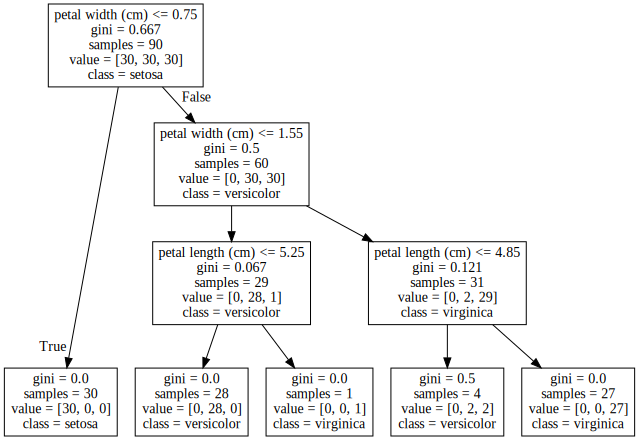

In [21]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                class_names=list(iris.target_names),
                                feature_names=list(iris.feature_names),
                                leaves_parallel=True)
graphviz.Source(dot_data)

## 3. Interpretação / Avaliação

### 3.1. Interpretação do modelo

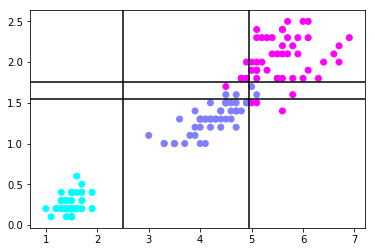

In [23]:
plt.scatter(x=data['petal length (cm)'], y=data['petal width (cm)'], c=data['target'], cmap='cool')
plt.axvline(2.5, c='k')
plt.axhline(1.55, c='k')
plt.axvline(4.95, c='k')
plt.axhline(1.75, c='k');

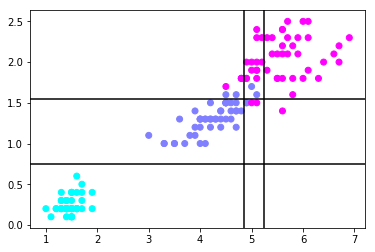

In [28]:
plt.scatter(x=data['petal length (cm)'], y=data['petal width (cm)'], c=data['target'], cmap='cool')

for atributo, limiar in zip(clf.tree_.feature, clf.tree_.threshold):
  if atributo == 2:
    plt.axvline(limiar, c='k')
  elif atributo == 3:
    plt.axhline(limiar, c='k')

### 3.2. Avaliação

Para a validação de qualquer algoritmo de AM é recomendável seguir procedimentos que garantam a corretude, a validade e a reprodutibilidade e as conclusões obtidas dos experimentos realizados.

Essa avaliação pode ser realizada por diferentes aspectos, dependendo da tarefa que cada algoritmo executa.

In [ ]:
expected = test['target']

predicted = clf.predict(test.drop(columns=['target'])) #somente os dados da base de testes sem o rótulo.

#### 3.2.1. Matriz de confusão

Uma forma usualmente empregada para visualizar o desempenho de um classificador é com o uso de uma matriz de confusão. Esta matriz ilustra o número de predições corretas e incorretas em cada classe.

As linhas representam as classes verdadeiras e as colunas representam as classes preditas pelo classificador.

In [ ]:
metrics.confusion_matrix(expected, predicted)

In [ ]:
df = pd.DataFrame(metrics.confusion_matrix(expected, predicted),
                  columns=['Predicted A', 'Predicted B', 'Predicted C'],
                  index=['True A', 'True B', 'True C'])
df

#### 3.2.2. Medida de desempenho

Taxa de acerto ou acurácia total: calculada pela soma dos valores da diagonal principal da matriz, dividida pela soma dos valores de todos os elementos da matriz.

Para um problema de duas classes:
$ac(f) = \dfrac{VP+VN}{n}$


In [ ]:
metrics.accuracy_score(expected, predicted)

# Bases sintéticas

Para vermos as diferenças entre os modelos lineares (como regressão polinomial) e modelos simbólicos (no caso, árvores), veremos duas bases sintéticas de dados: XOR e a base X > Y.

In [ ]:
xor_x = np.random.rand(50, 2)
xor_y = xor_x[:, 0].round().astype(np.bool) ^ xor_x[:, 1].round().astype(np.bool)

plt.scatter(x=xor_x[:, 0], y=xor_x[:, 1], c=xor_y, cmap='winter');

In [ ]:
x = np.random.rand(200, 2)
y = x[:, 0] > x[:, 1]
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='winter');

In [ ]:
linear = SGDClassifier(max_iter=200)
linear.fit(x, y)

In [ ]:
xamostra = np.linspace(0, 1, 10)
yamostra = np.linspace(0, 1, 10)

xgrid, ygrid = np.meshgrid(xamostra, yamostra)
linha = np.empty(xgrid.shape)

for (i, j), _ in np.ndenumerate(xgrid):
  val_x = xgrid[i, j]
  val_y = ygrid[i, j]
  linha[i, j] = linear.decision_function([[val_x, val_y]])

plt.scatter(x[:, 0], x[:, 1], c=y, cmap='winter', s=80)
plt.contour(xgrid, ygrid, linha, levels=0.0, colors='k');

In [ ]:
arvore = tree.DecisionTreeClassifier(max_depth=4)
arvore.fit(x, y)

dot_data = tree.export_graphviz(arvore, out_file=None,
                                class_names=['0', '1'],
                                feature_names=['x', 'y'],
                                leaves_parallel=True)
graphviz.Source(dot_data)

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='winter', s=80)

for atributo, limiar in zip(arvore.tree_.feature, arvore.tree_.threshold):
  if atributo == 0:
    plt.axvline(limiar, c='k')
  elif atributo == 1:
    plt.axhline(limiar, c='k')

In [ ]:
novo_x = np.vstack([x[:, 0], x[:, 1], x[:, 0] - x[:, 1]]).T
arvore2 = tree.DecisionTreeClassifier()
arvore2.fit(novo_x, y)

dot_data = tree.export_graphviz(arvore2, out_file=None,
                                class_names=['0', '1'],
                                feature_names=['x', 'y', 'x-y'],
                                leaves_parallel=True)
graphviz.Source(dot_data)

## Árvores de Regressão

Muito similar às árvores de decisão, mas utilizando diferentes critérios para divisão dos nós, e gerando uma função regressora nas folhas.

No caso do SKLearn no entanto, a função regressora é só a média dos dados, como constante.

In [ ]:
boston = load_boston()

In [ ]:
regressor = tree.DecisionTreeRegressor(max_depth=4)
regressor.fit(boston.data, boston.target)

In [ ]:
dot_data = tree.export_graphviz(regressor,
                                out_file=None,
                                feature_names=boston.feature_names)
graphviz.Source(dot_data)